Sentiment analysis is also called opinion mining.
It is the process of gaining an understanding of the opinion/emotion of an author about a subject.

My take: It is the attainment of meaning and intent behind text guided by opinion/emotion, subject and opinion holder which make up the elements of a sentiment analysis system.

Opinion is determined based on polarity: positive, neutral and negative

In [4]:
import pandas as pd

In [25]:
imdb_data=pd.read_csv('IMDB_sample.csv')
imdb_data.head()

,Unnamed: 0,review,label
0,18245,This short spoof can be found on Elite's Mille...,0
1,19801,A singularly unfunny musical comedy that artif...,0
2,3222,"An excellent series, masterfully acted and dir...",1
3,6010,The master of movie spectacle Cecil B. De Mill...,1
4,16355,I was gifted with this movie as it had such a ...,0


The label column indicates the polarity of the reviews with 1 showing positive and 0 indicating negative
We call the values in the label column using the dot(.) method and use the value_counts() method to get the number of reviews by polarity

In [6]:
imdb_data.label.value_counts()

0    3782
1    3719
Name: label, dtype: int64

The number of rows/records within a dataset can be attained by using the len() function.
The len() function together with the value_counts() function indicated above can be used to get the percentages of reviews by their polarities.
We get the number of reviews (against polarity) then divide the value by the total number of records

In [8]:
imdb_data.label.value_counts()/len(imdb_data)

0    0.504199
1    0.495801
Name: label, dtype: float64

How long is the longest review
We could use the dot(.) method to capture the review column then use the str.len() method/operator to get the length of the longest review in our dataset
The length of the reviews can be stored in a dataframe which can then be sorted starting from the longest review using the sort_values function and the 'ascending=False' arguement to sort the dataframe in descending order.

In [29]:
length_reviews=imdb_data.review.str.len()
length_reviews.sort_values(ascending=False)

#We could also get the length of the longest review using the max() function on the dataframe attained above
max(length_reviews)

#To get the length of the shortest review, we use the min() function on our dataframe 
min(length_reviews)

52

Sentiment analaysis can be undertaken on different levels of granularity which include the document level, sentence level and aspect level.
Algorithms used for sentiment analysis are mainly grouped into two main categories:
    1. Rule/lexicon-based
       Rely on scoring based on a set of words/phrases with a final score attained by averaging the scores
       Phrases could include:
       nice: assigned a score of +2; good: assigned a score of +1; terrible: assigned a score of -3 etc.
       Example:
       Today was a good day
       Score- Today: 0, was: 0, a: 0, good: +1, day: 0
       Total valance: +1
    2. Automatic/Machine Learning
       Relies on machine learning tools to undertake sentiment analysis
       An example of this using our text above would follow the following steps:
           i) Capture the text in a variable/container
           ii) Get the relevant dependencies (the TextBlob package and its accompanying textblob function)
           ii) Call the variable/container using the TextBlob function
           iii) Call the sentiment method to get a tuple with the text's polarity (-1 to 1) scale and subjectivity (0-1) scale 

In [35]:
text="Today was a good day"
from textblob import TextBlob
my_valance=TextBlob(text)
my_valance.sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

The choice between the two algorithm types is determined by a number of factors.
The automated/machine learning algorithm approach relies on having labelled historical data.
The rule/lexicon-based approach relies on having manually created rules/dictionaries/valance scores.
The rule/lexicon-based approach fail at certain tasks/are not reliable since different words might have different polarity in different contexts which might not be refelected/captured in a predefined dictionary.
Rule/Lexicon-based approaches have the advantage of being relatively fast compared to the machine learning/automatic approach generally because ML models might take a while to train.
ML/Automatic approaches are quite powerful compared to to the lexicon approach.

Creating a word cloud in Python.
The size of a word/text corresponds to the frequency of the word in the context of the word cloud.
The importance of word clouds:
    They can reveal the essential/focus of a text/opinion grouping.
    They provide an overall sense of the text.
    They are easy to grasp and are relatively engaging.
They however have their disadvantages:
    They can be confusing and uninformative
    Larger text groupings might require more work with regards to pre-processing and so forth    
    
Building a word cloud in Python calls for the use of the WordCloud function from the wordcloud package and the matplotlib package as well for visualization generation   

In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

two_cities='''It was the best of times, it was the worst of times,
            it was the age of wisdom, it was the age of foolishness,
            it was the epoch of belief, it was the epoch of incredulity,
            it was the season of Light, it was the season of Darkness,
            it was the spring of hope, it was the winter of despair,
            we had everything before us, we had nothing before us,
            we were all going direct to Heaven, we were all going
            direct the other way - in short, the period was so far
            like the present period, that some of its noisiest
            authorities insisted on its being received, for good
            or for evil, in the superlative degree of comparison only.'''

In [79]:
#We will assign the results of the WordCloud() function to a container
#We will specify the background_color arguement for the WordCloud() function with the value of "white" being assigned
cloud_two_cities=WordCloud(background_color="white").generate(two_cities)

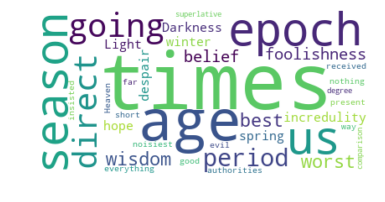

In [80]:
#In order to display the word cloud abject created above, we will have to call a matplotlib fuction (imshow())
#We will specify the word cloud object/container created above as a arguement
#We will also specify the interpolation arguement as 'bilinear' for the plot to appear more smoothly
plt.imshow(cloud_two_cities, interpolation='bilinear')

#To remove the axis which will appear after the execution of the code avove, we use axis function with an arguement of 'off'
plt.axis('off')
plt.show()